# Model Selection

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pickle
import time
import os
import json
import seaborn as sns

from pandas import json_normalize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score,classification_report
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.compose import ColumnTransformer

import librosa
from scipy.stats import skew

## Data Imports

In [6]:
# with open('pickles/df_resampled.pkl', 'rb') as f:
#     df_resampled = pickle.load(f)
    
with open('pickles/df_model.pkl', 'rb') as f:
    df_model = pickle.load(f)

### Identifying Target Variable

In [7]:
df_model.columns

Index(['utteranceId', 'choice', 'modelId', 'locale', 'isNative', 'lowNatural',
       'highSynthetic', 'clean', 'listenerReliability', 'MOS', 'filename',
       'spectral_centroids', 'spectral_bandwidth', 'spectral_contrast',
       'zero_crossing_rate', 'chroma_cens', 'mel_spectrogram', 'mfccs_0',
       'mfccs_1', 'mfccs_2', 'mfccs_3', 'mfccs_4', 'mfccs_5', 'mfccs_6',
       'mfccs_7', 'mfccs_8', 'mfccs_9', 'mfccs_10', 'mfccs_11', 'mfccs_12'],
      dtype='object')

In [9]:
drop_columns = ['modelId','choice','isNative','wrongValidation','lowNatural','sameScores','highSynthetic','clean','listenerReliability']
keep_columns = ['mfccs_0', 'mfccs_1', 'mfccs_2', 'mfccs_3', 'mfccs_4', 'mfccs_5', 'mfccs_6', 'mfccs_7', 'mfccs_8', 'mfccs_9', 'mfccs_10', 'mfccs_11', 'mfccs_12']

In [10]:
X = df_model[keep_columns]
y = df_model['modelId']

### Train Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

### Scaling the Data

In [12]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

### Null Model

Before we model our data, we need to establish a null model that we will use as a benchmark for the efficacy of our model.

In [13]:
null_model = y.value_counts(normalize = True)
null_model

0    0.947363
1    0.052637
Name: modelId, dtype: float64

From the above counts, our data is balanced and our null model indicates that the baseline accuracy is 50%

In [14]:
y.shape, y_train.shape, y_test.shape, Z_train.shape, Z_test.shape, X_train.shape,X_test.shape

((339208,),
 (271366,),
 (67842,),
 (271366, 13),
 (67842, 13),
 (271366, 13),
 (67842, 13))

### Random Forest

In [15]:
model_rf = RandomForestClassifier()
model_rf.fit(Z_train,y_train)
y_pred = model_rf.predict(Z_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64216
           1       1.00      1.00      1.00      3626

    accuracy                           1.00     67842
   macro avg       1.00      1.00      1.00     67842
weighted avg       1.00      1.00      1.00     67842



In [16]:
importances = RandomForestClassifier().fit(Z_train, y_train).feature_importances_
importances

array([0.05679109, 0.31483926, 0.10217697, 0.0594527 , 0.05830056,
       0.05311798, 0.056626  , 0.05346142, 0.04995034, 0.04707557,
       0.04833094, 0.05023136, 0.04964582])

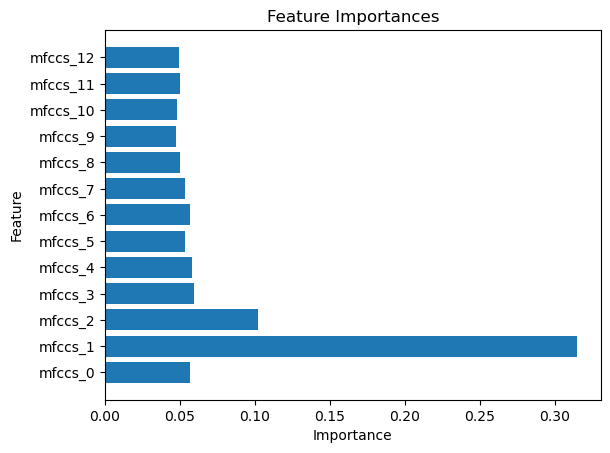

In [17]:
plt.barh(X.columns, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

###########From the above plot, we see that Mean Opinion Score (MOS) is the most important feature for this specific dataset. MOS is a value that was reported by each individual listener that was reponsible for quality checking the data before it was modelled.

This value tells us the quality of the individual recording, however, because we are interesting in determining whether or not it is possible to determine if a audio signal is human or generated, we'll drop this feature.

It is worth noting that the importance of MOS indicates that it is feasible for the human ear to determine if a voice is generated or human.

In [ ]:
corr_matrix = df_metrics_re.corr()
print(corr_matrix)

In [ ]:
sns.heatmap(corr_matrix, annot=False);

In [ ]:
df_resampled.columns

In [ ]:
drop_columns = ['modelId','choice','isNative','wrongValidation','lowNatural','sameScores','highSynthetic','clean','listenerReliability','MOS','min_mfccs','max_spectral_centroids','mean_spectral_contrast']
keep_columns = ['chroma_cens','zero_crossing_rate','mean_spectral_bandwidth']

In [ ]:
X = df_resampled[keep_columns]
y = df_resampled['modelId']
X.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [ ]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(Z_train,y_train)
model_rf.score(Z_test,y_test)

In [ ]:
importances = RandomForestClassifier().fit(Z_train, y_train).feature_importances_

In [ ]:
plt.barh(X.columns, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()